<a href="https://colab.research.google.com/github/skizzle010/EDA-Theory-DA-21BDS0180/blob/main/21BDS0180_Theory_DA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Utkarsh Rai**

### **21BDS0180**

Exploratory Data Analysis- Theory Assignment

Missing values in each column:

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64


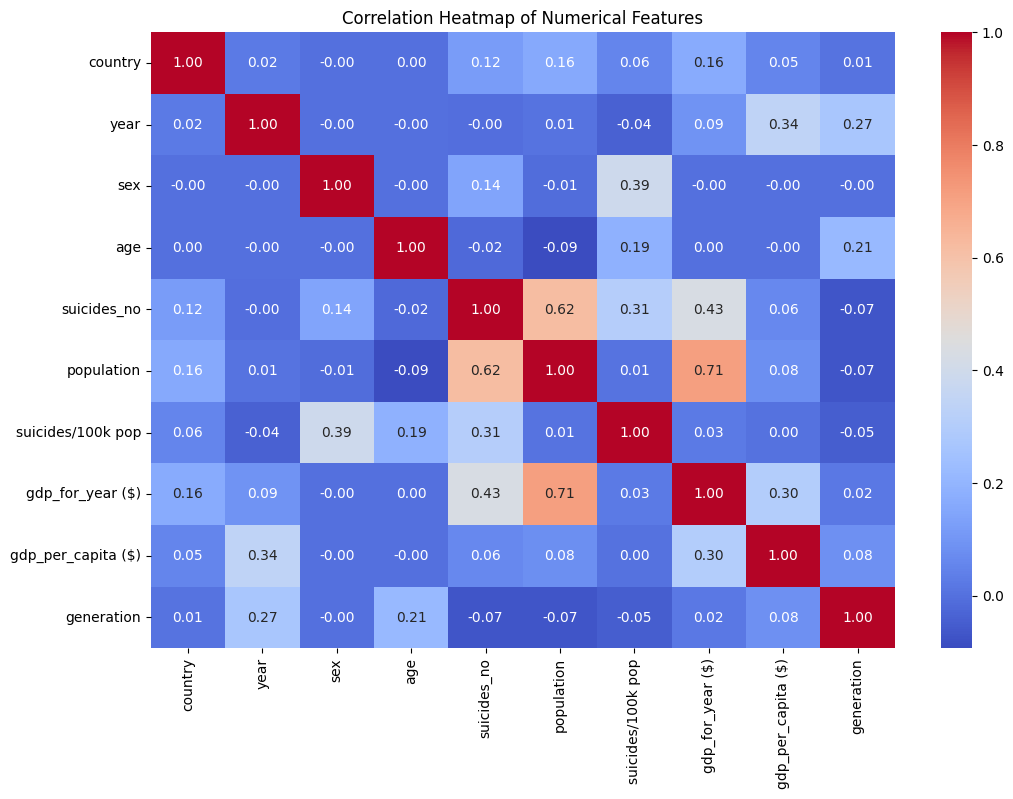

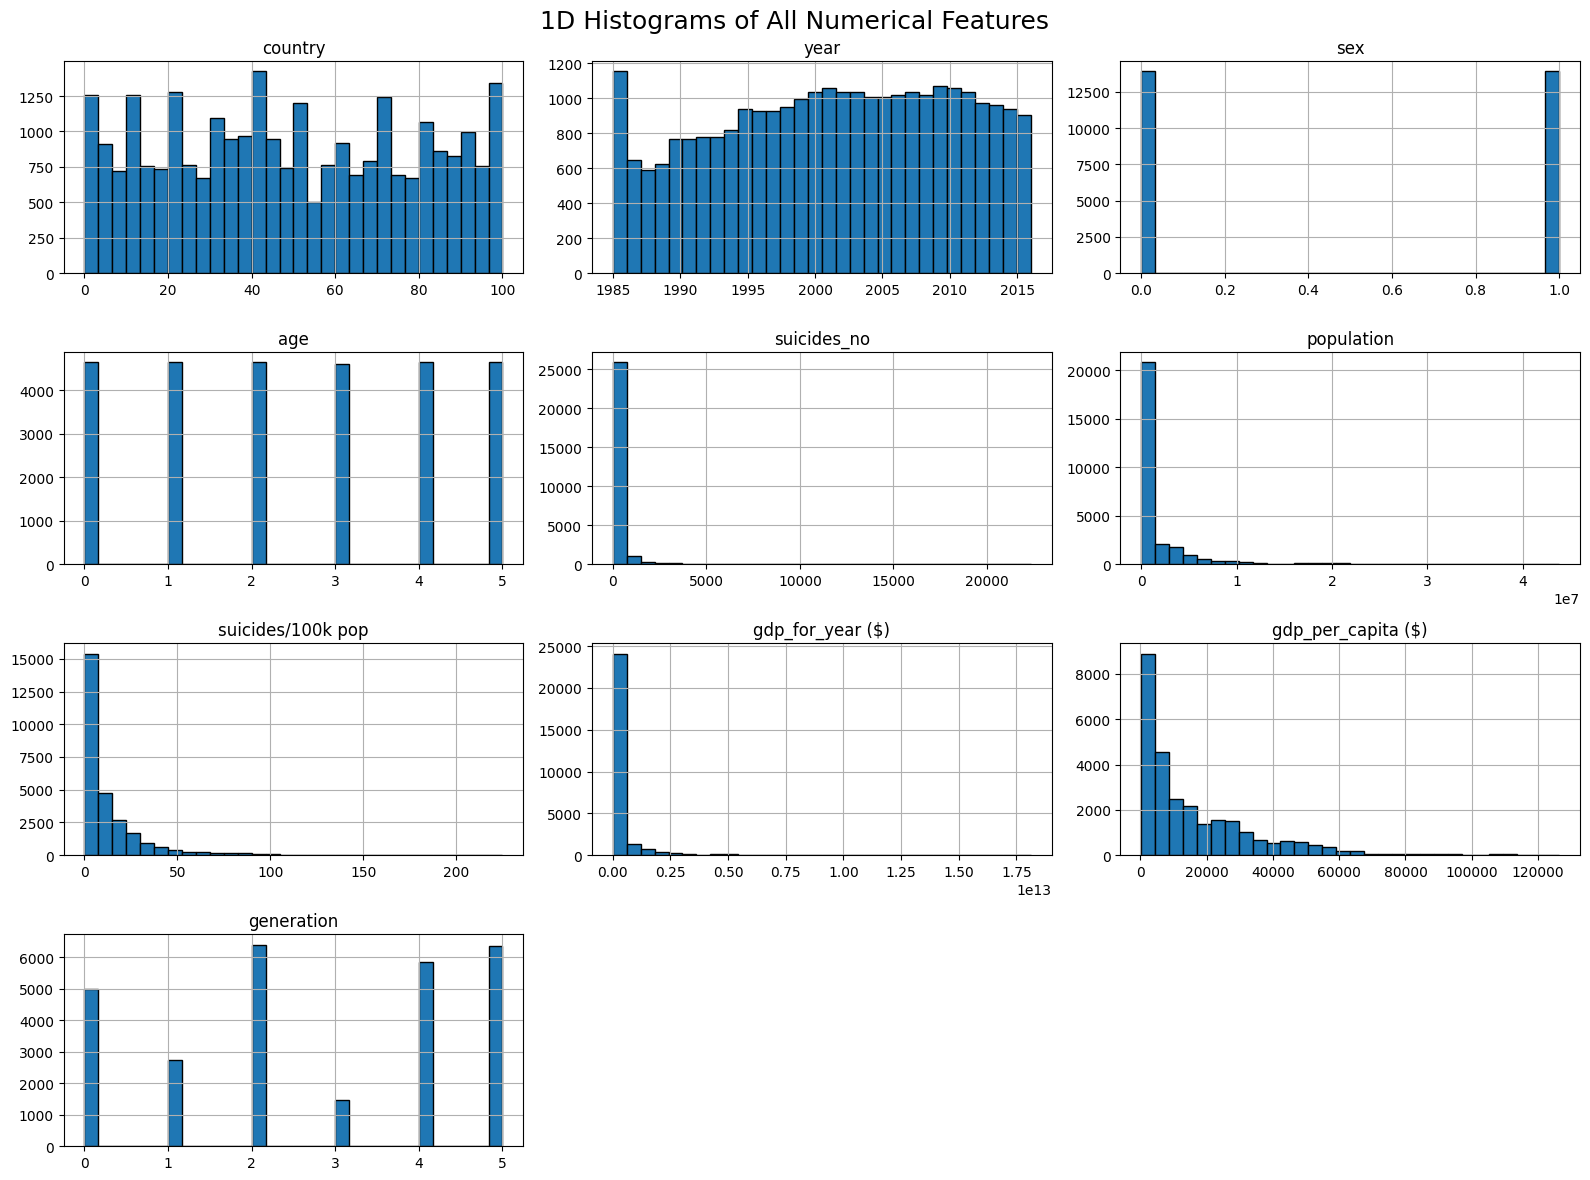

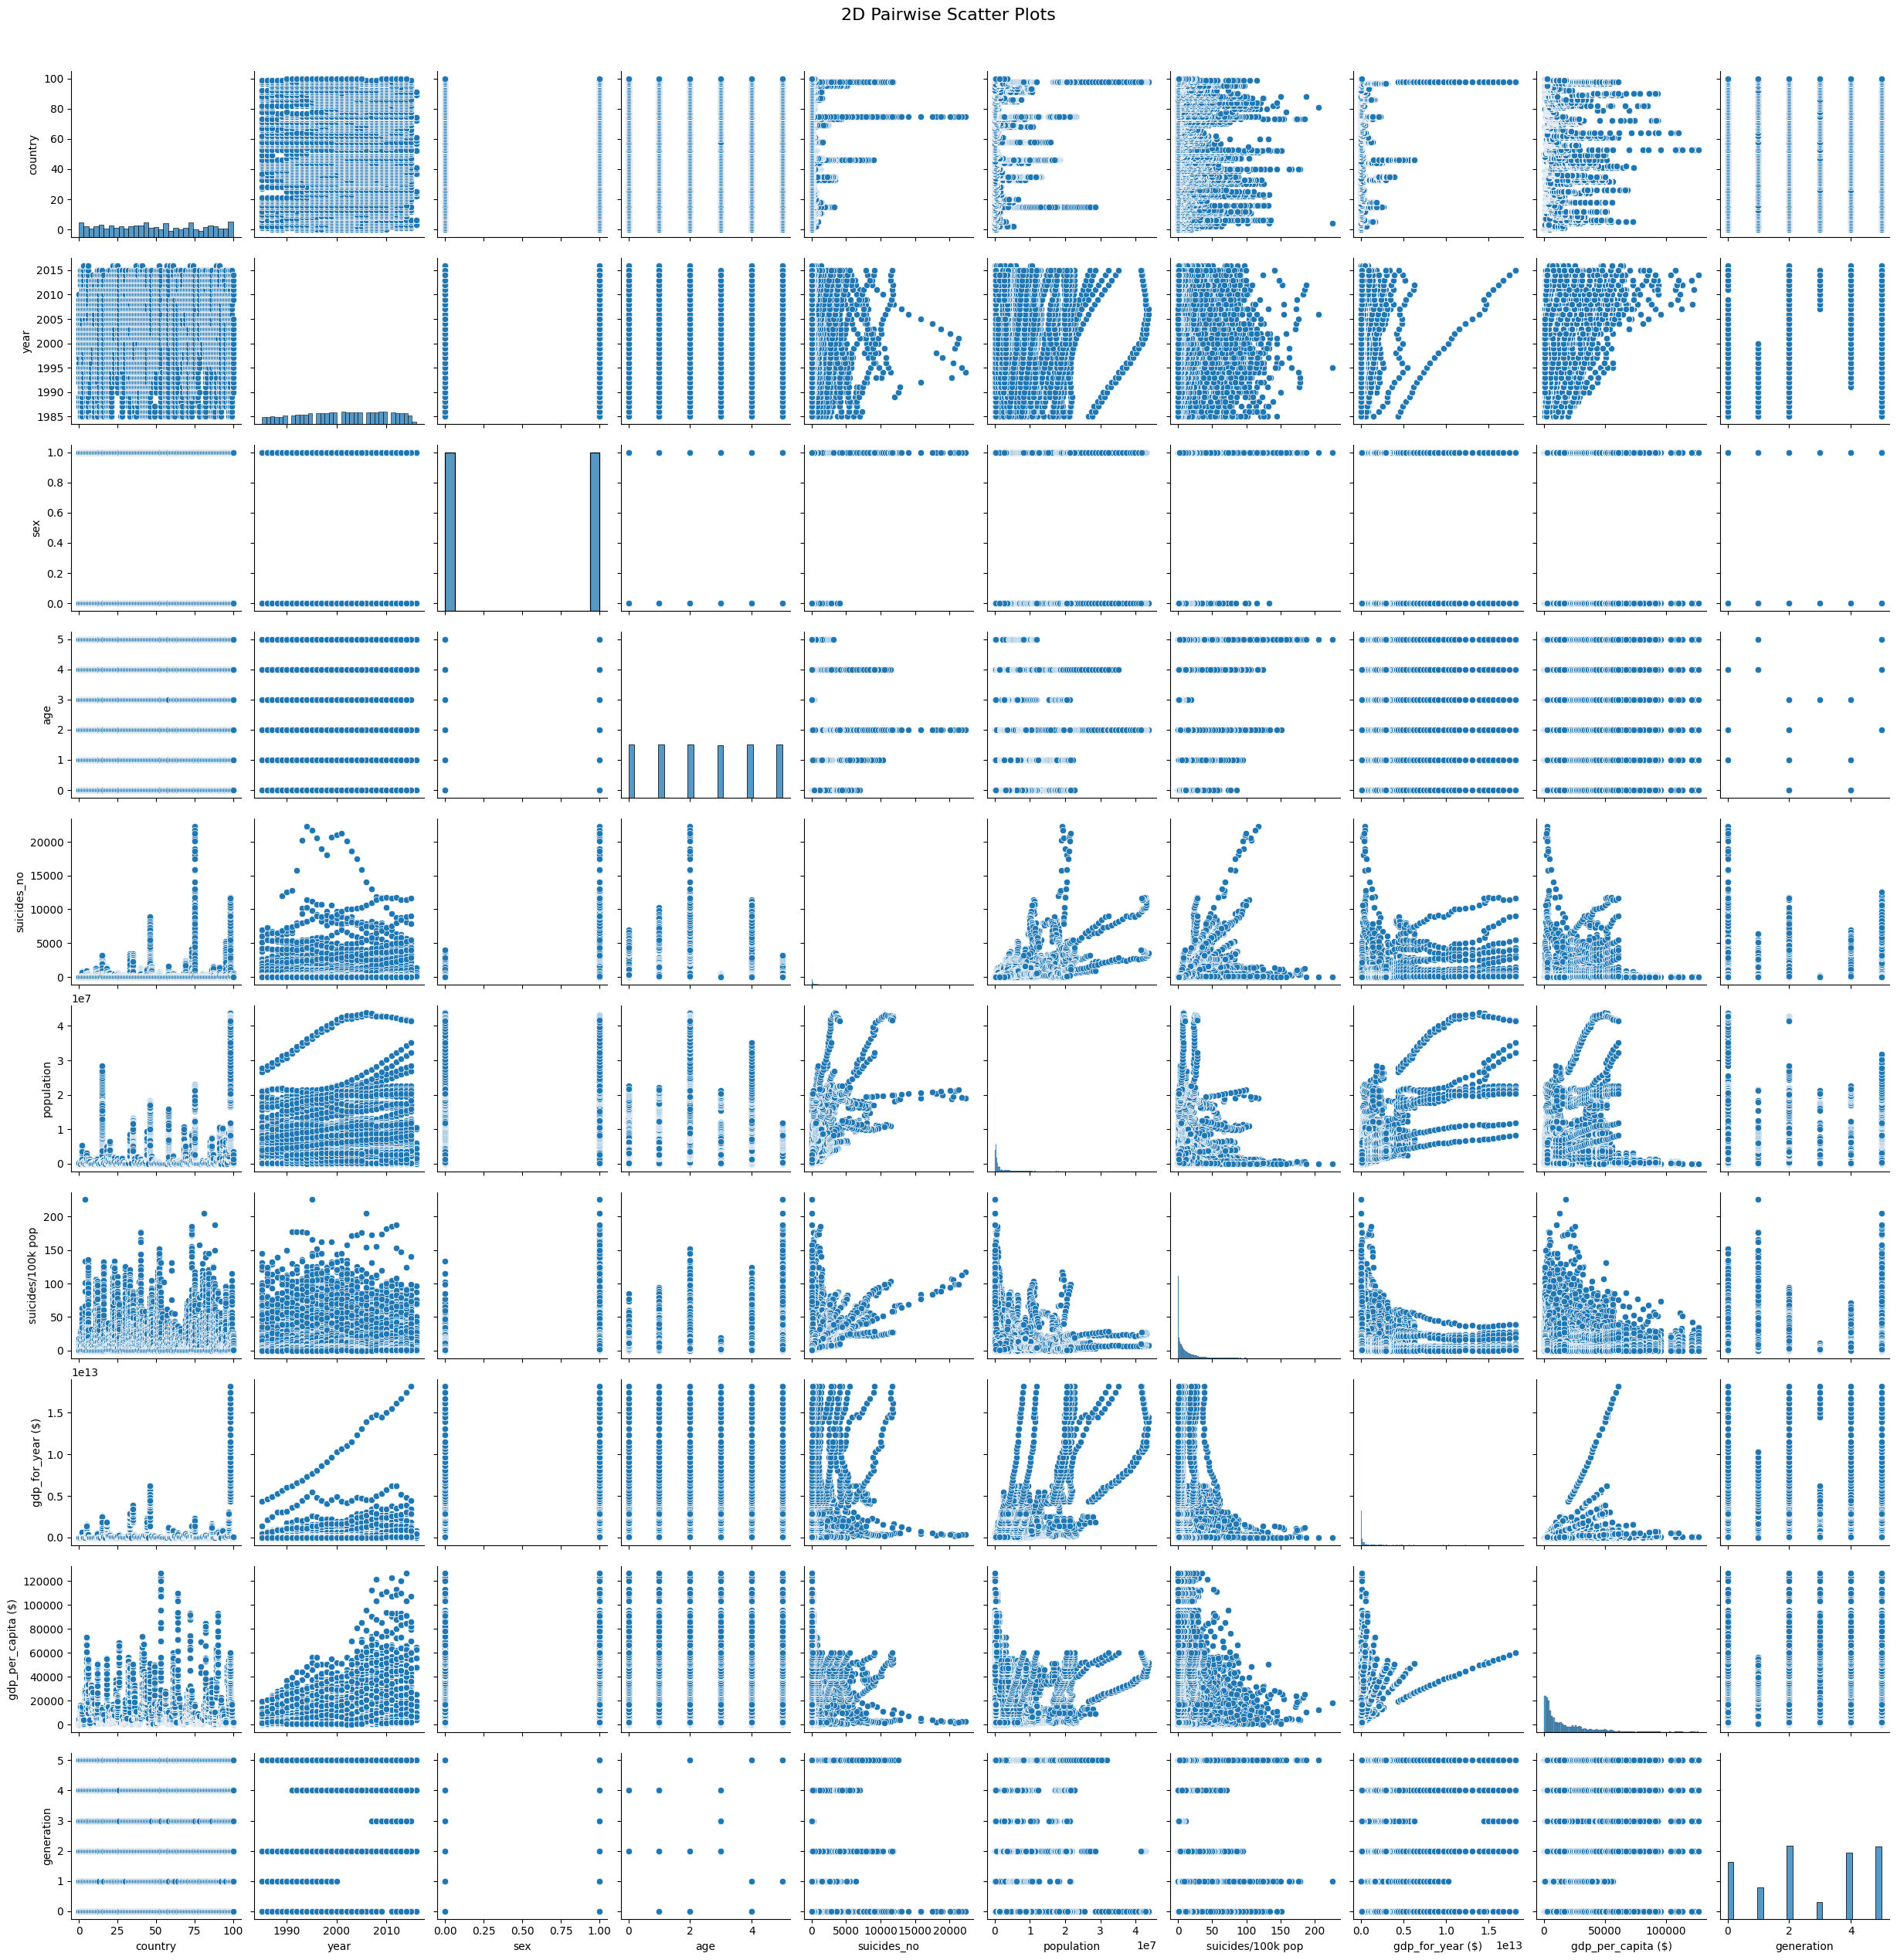

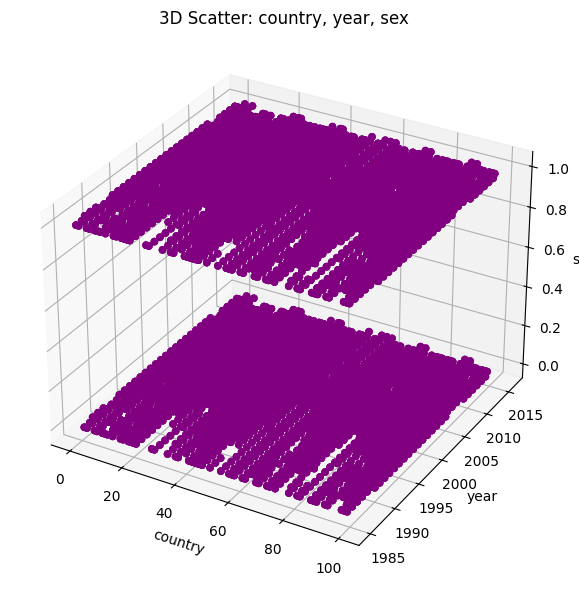

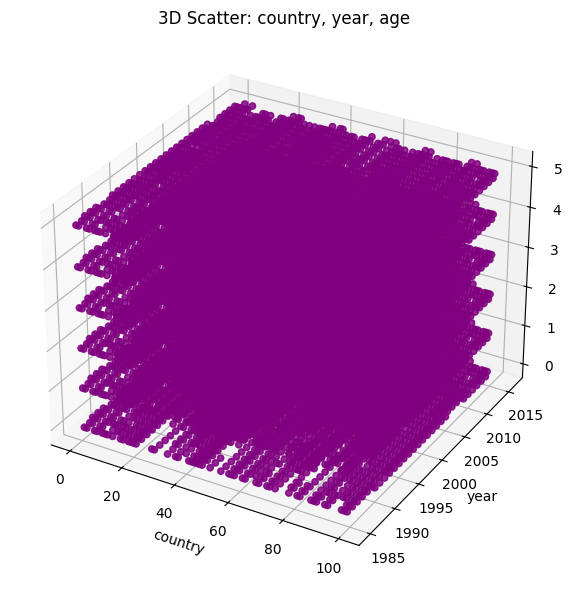

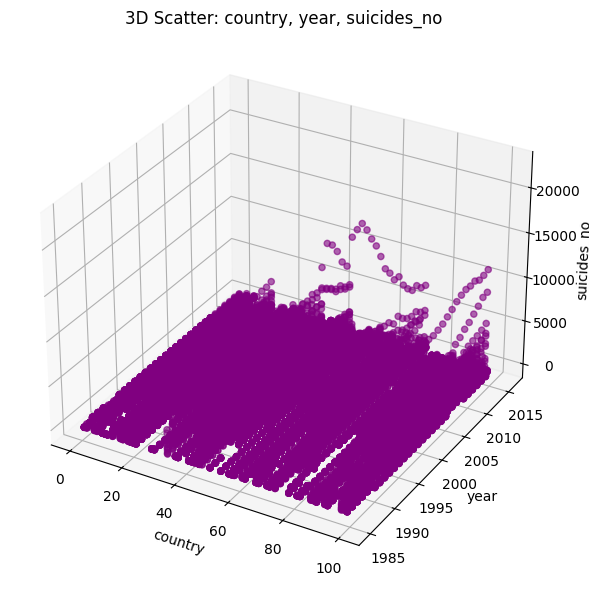

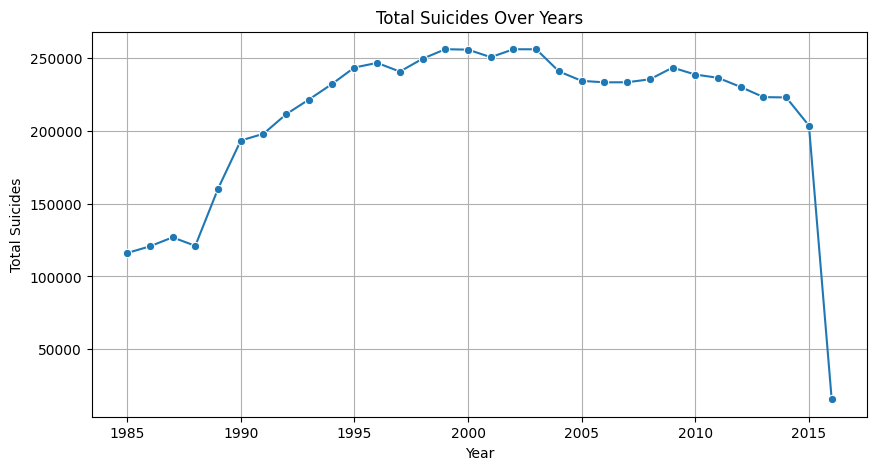

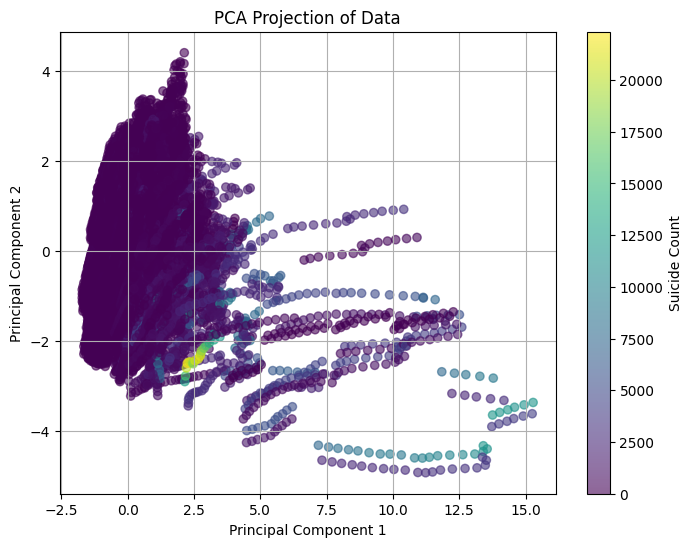


Mean Squared Error: 5221.16
R-squared: 0.99


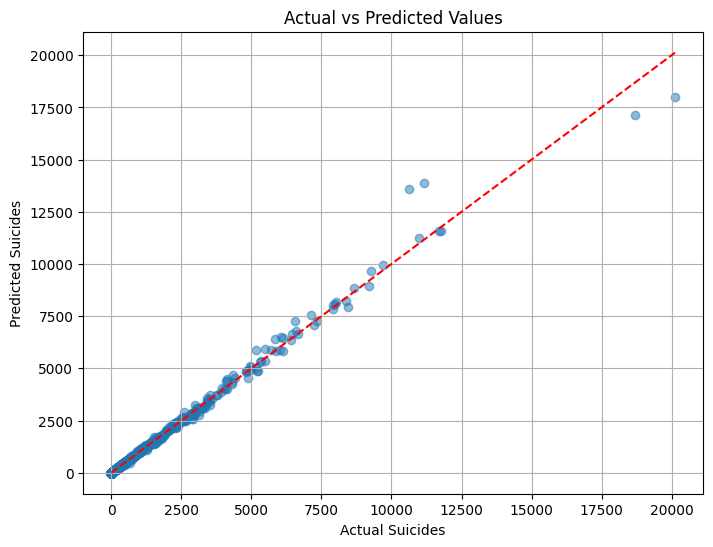

In [8]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# === LOAD DATA ===
df = pd.read_csv("Suicide data.csv")
df.columns = df.columns.str.strip()

# === PRINT MISSING VALUES ===
print("Missing values in each column:\n")
print(df.isnull().sum())

# === DATA CLEANING ===
df.drop(columns=["HDI for year", "country-year"], inplace=True)
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)
df.dropna(inplace=True)

# === DATA HANDLING (ENCODING) ===
label_encoders = {}
for col in ['country', 'sex', 'age', 'generation']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# === ✅ CORRELATION HEATMAP ===
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# === 1D VISUALIZATION: ALL NUMERICAL FEATURES ===
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("1D Histograms of All Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()

# === 2D VISUALIZATION: PAIRPLOT ===
sns.pairplot(df[numerical_cols])
plt.suptitle("2D Pairwise Scatter Plots", y=1.02, fontsize=16)
plt.show()

# === 3D VISUALIZATION: FIRST 3 COMBINATIONS OF NUMERIC FEATURES ===
num_cols = list(numerical_cols)
combi = list(combinations(num_cols, 3))

for i, (x, y, z) in enumerate(combi[:3]):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x], df[y], df[z], c='purple', alpha=0.6)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    plt.title(f"3D Scatter: {x}, {y}, {z}")
    plt.tight_layout()
    plt.show()

# === TIME SERIES ANALYSIS ===
if 'year' in df.columns:
    df_yearly = df.groupby('year')['suicides_no'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='year', y='suicides_no', data=df_yearly, marker='o')
    plt.title("Total Suicides Over Years")
    plt.xlabel("Year")
    plt.ylabel("Total Suicides")
    plt.grid(True)
    plt.show()

# === DIMENSIONALITY REDUCTION (PCA) ===
X = df.drop(columns=['suicides_no'])
y = df['suicides_no']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Data')
plt.colorbar(label='Suicide Count')
plt.grid(True)
plt.show()

# === MODEL BUILDING (RANDOM FOREST REGRESSOR) ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === MODEL EVALUATION ===
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# === ACTUAL vs PREDICTED PLOT ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Suicides')
plt.ylabel('Predicted Suicides')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()
